<a href="https://colab.research.google.com/github/kkokay07/Learning-Machine-Learning/blob/main/Regression%20Model/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Mathematical Foundation

### Basic Equation
The multiple linear regression model is represented by:
Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

Where:
- Y: Dependent variable
- β₀: Y-intercept
- βᵢ: Coefficient for the i-th feature
- Xᵢ: i-th independent variable
- ε: Error term
- n: Number of features

## Real-World Example: Car Price Prediction

Let's build a comprehensive example using car price prediction with multiple features.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Create sample dataset
np.random.seed(42)
n_samples = 1000

In [3]:
# Generate features
car_data = {
    'mileage': np.random.normal(50000, 20000, n_samples),
    'age': np.random.uniform(0, 10, n_samples),
    'horsepower': np.random.normal(200, 50, n_samples),
    'weight': np.random.normal(3000, 500, n_samples)
}

In [4]:
# Generate target variable (price) with some noise
base_price = 25000
price = (base_price
         - 0.1 * car_data['mileage']  # Price decreases with mileage
         - 1000 * car_data['age']     # Price decreases with age
         + 100 * car_data['horsepower']  # Price increases with horsepower
         - 2 * car_data['weight']     # Price decreases with weight
         + np.random.normal(0, 5000, n_samples))  # Add noise

car_data['price'] = price

In [5]:
# Create DataFrame
df = pd.DataFrame(car_data)

In [6]:
# Feature Engineering & Data Preparation
X = df[['mileage', 'age', 'horsepower', 'weight']]
y = df['price']

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [11]:
# Model evaluation
print("\nModel Performance Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):.2f}")


Model Performance Metrics:
R² Score: 0.515
RMSE: $5153.44
MAE: $4141.93


In [12]:
# Print coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
      Feature  Coefficient
0     mileage -1942.260943
1         age -2861.439254
2  horsepower  5002.966223
3      weight  -987.453532


## Visualizations

### 1. Correlation Heatmap

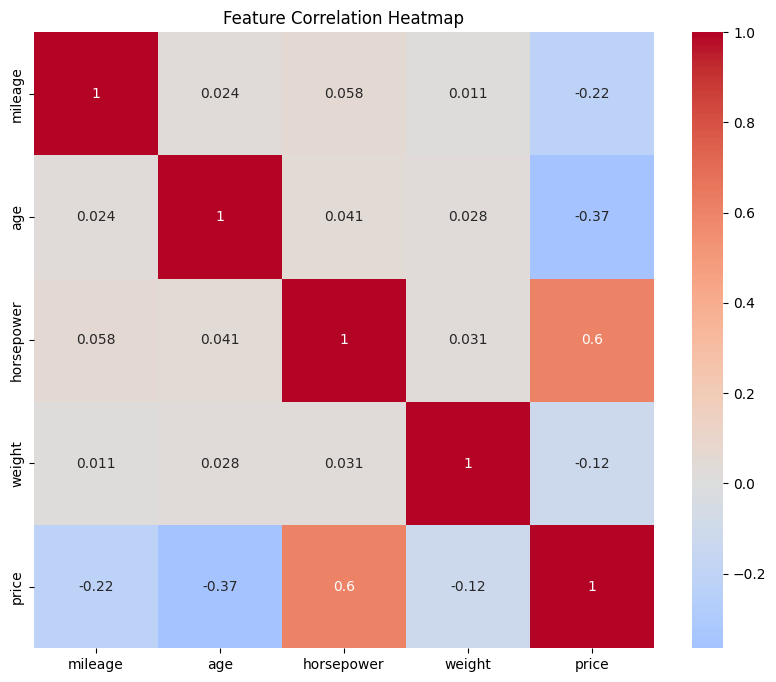

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

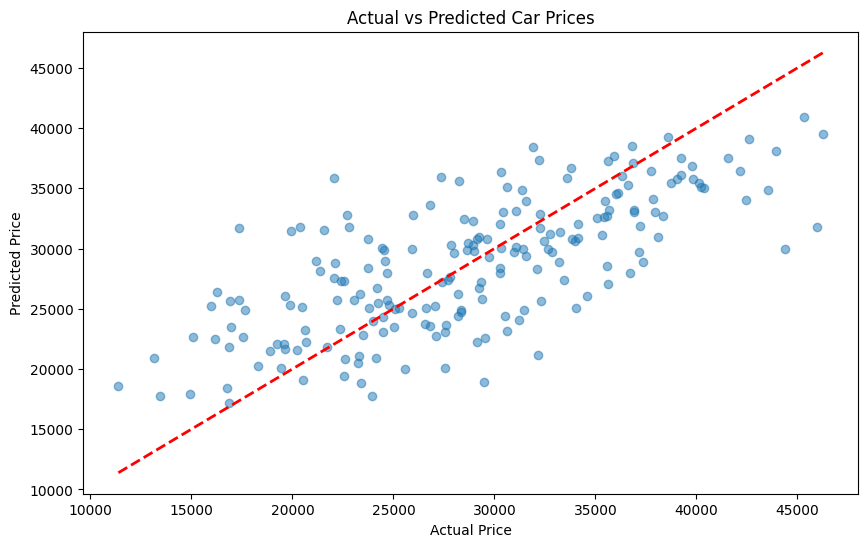

In [14]:
### 2. Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

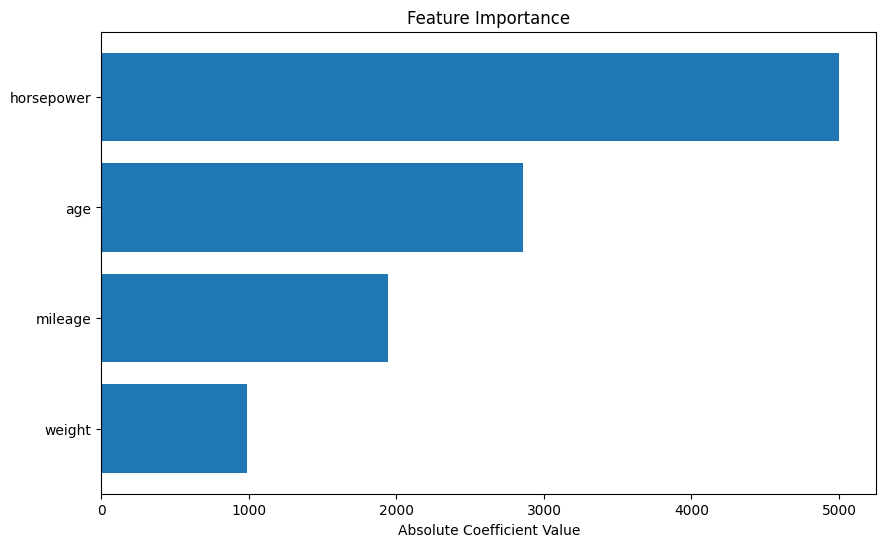

In [15]:
### 3. Feature Importance Plot
plt.figure(figsize=(10, 6))
importance = pd.DataFrame({
    'Feature': X.columns,
    'Absolute Coefficient': np.abs(model.coef_)
})
importance = importance.sort_values('Absolute Coefficient', ascending=True)

plt.barh(importance['Feature'], importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.show()

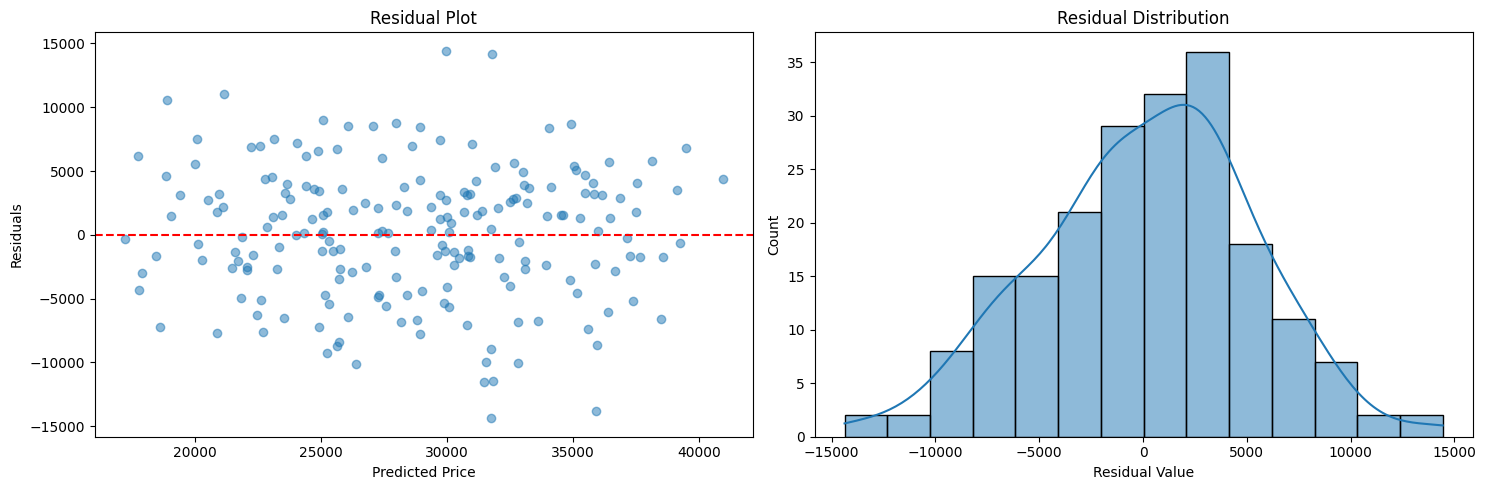

In [16]:
### 4. Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(15, 5))

# Residual Plot
plt.subplot(121)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Residual Distribution
plt.subplot(122)
sns.histplot(residuals, kde=True)
plt.xlabel('Residual Value')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

## Advanced Analysis Techniques

In [17]:
### 1. Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

print("\nPolynomial Model R² Score:", r2_score(y_test, y_pred_poly))


Polynomial Model R² Score: 0.5048113317427247


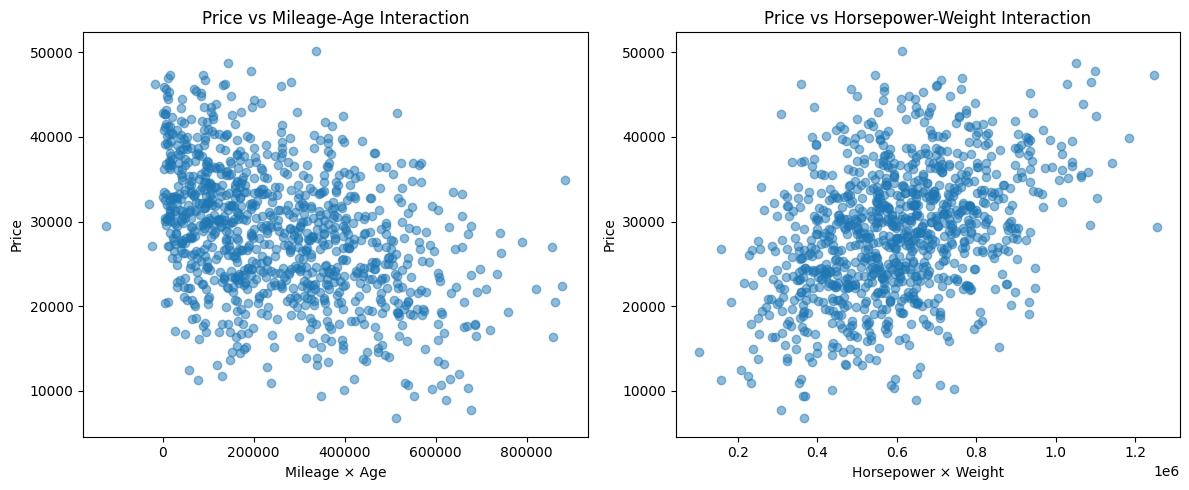

In [18]:
### 2. Feature Interaction Analysis
# Create interaction terms manually
df['mileage_age'] = df['mileage'] * df['age']
df['horsepower_weight'] = df['horsepower'] * df['weight']

# Visualize interactions
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(df['mileage_age'], df['price'], alpha=0.5)
plt.xlabel('Mileage × Age')
plt.ylabel('Price')
plt.title('Price vs Mileage-Age Interaction')

plt.subplot(122)
plt.scatter(df['horsepower_weight'], df['price'], alpha=0.5)
plt.xlabel('Horsepower × Weight')
plt.ylabel('Price')
plt.title('Price vs Horsepower-Weight Interaction')

plt.tight_layout()
plt.show()

## Feature Selection Techniques

In [19]:
### 1. Backward Elimination
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe = rfe.fit(X_train_scaled, y_train)

# Print selected features
selected_features = X.columns[rfe.support_]
print("\nSelected Features:", selected_features)


Selected Features: Index(['mileage', 'age', 'horsepower'], dtype='object')


In [20]:
### 2. LASSO Regression
from sklearn.linear_model import Lasso

# Fit LASSO model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

# Print non-zero coefficients
lasso_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print("\nLASSO Coefficients:")
print(lasso_coef[lasso_coef['Coefficient'] != 0])


LASSO Coefficients:
      Feature  Coefficient
0     mileage -1941.209123
1         age -2860.519290
2  horsepower  5001.837817
3      weight  -986.497650


## Model Validation

In [21]:
### Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5)

print("\nCross-Validation Scores:")
print(f"Mean R²: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Cross-Validation Scores:
Mean R²: 0.599 (+/- 0.060)


## Practical Applications

1. **Real Estate Valuation**
   - Features: location, size, age, amenities
   - Target: property price
   - Use: automated valuation models

2. **Sales Forecasting**
   - Features: advertising spend, seasonality, competitor prices
   - Target: sales volume
   - Use: budget planning

3. **Customer Lifetime Value**
   - Features: purchase history, demographics, engagement metrics
   - Target: future value
   - Use: customer segmentation

## Best Practices

1. **Feature Engineering**
   - Create meaningful interactions
   - Handle categorical variables properly
   - Scale features appropriately

2. **Model Selection**
   - Compare different regression techniques
   - Use cross-validation
   - Consider model complexity

3. **Diagnostics**
   - Check assumptions
   - Analyze residuals
   - Identify influential observations

4. **Documentation**
   - Record preprocessing steps
   - Document model decisions
   - Track performance metrics
